# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

## Read Data

In [2]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [3]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [4]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [7]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


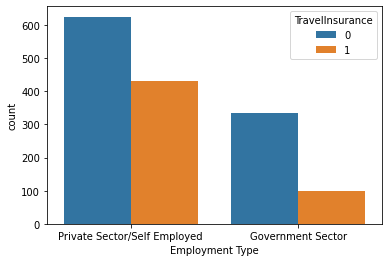

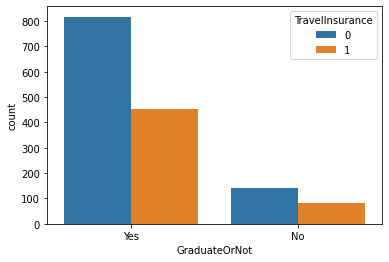

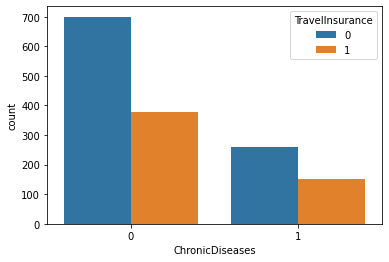

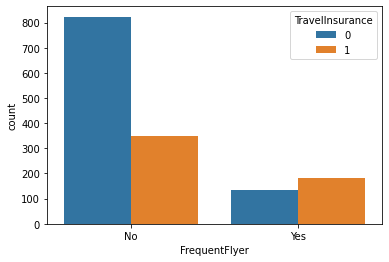

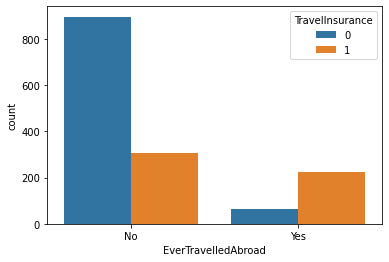

In [9]:
df_cat=train_df.drop(['Age','AnnualIncome','TravelInsurance', 'Customer', 'FamilyMembers'],axis=1).columns
for feature in df_cat:
    sns.countplot(data=train_df,x=feature,hue='TravelInsurance')
    plt.show()

Con estos graficos podemos observar que por lo general en todas las categorias de mantiene la tendencia del dataset, con mas personas que no obtuvieron el seguro que viaje que las que si, excepto por las 2 ultimas features. en donde las personas que son viajeros frecuentes o que viajaron al exterior, tienden mas a comprar el seguro de viaje

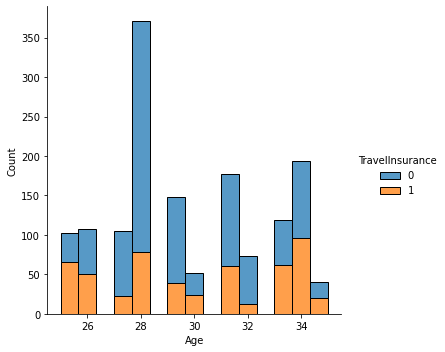

In [10]:
sns.displot(data=train_df, x="Age", hue="TravelInsurance", multiple="stack")

Si vemos la edad, en todas las edades se mantiene la tendencia. Entre los 28 y los 32 se puede ver bastante mas exagerada la proporcion de gente que NO adquiere seguros de viajes

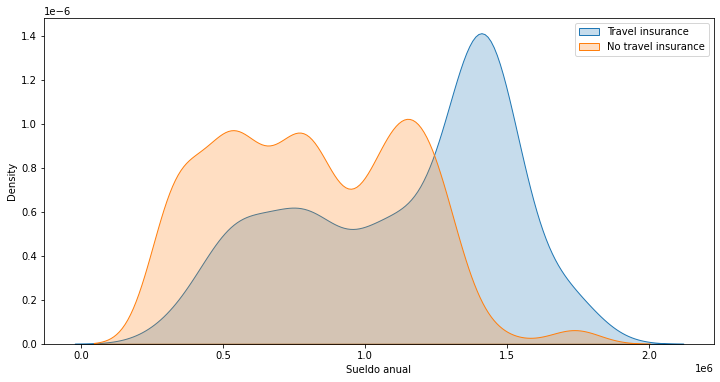

In [11]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(train_df["AnnualIncome"][train_df.TravelInsurance == 1], shade=True)
sns.kdeplot(train_df["AnnualIncome"][train_df.TravelInsurance == 0],shade=True)
plt.legend(['Travel insurance', 'No travel insurance'])
ax.set(xlabel='Sueldo anual')
plt.show()

En este grafico podemos ver que la gente que tiene un sueldo mayor es mucho mas propensa a tener adquirir el seguro de viaje

## Baseline

In this section we present a baseline based on a decision tree classifier.

Many of the attributes are binary, there are a couple of numeric attributes, we might be able to one-hot (e.g. family members), or event discretize (age and anual income), this will come more clearly after the EDA.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report,f1_score,accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Transform the columns into features

First we need to transform the columns into features. The type of features we use will have a direct impact on the final result. In this example we decided to discretize some numeric features and make a one hot encoding of others. The number of bins, what we use as a one hot encoding, etc, is all up to you to try it out.

In [13]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "FamilyMembers"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]),
     (StandardScaler(), ["AnnualIncome"]),
    remainder="passthrough")

Aca aplico un StandardScaler a el salario anual debido a que es importante esta feature por lo que vimos en el EDA y si la procesamos tal como esta, la dispersion es muy grande

In [14]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer"]))

### Grid Search



In [15]:
model_name = []
f1_result = []
def opt_models(model, params):
    print(" \033[1m Modelo con parametros por defecto \033[0m")
    model.fit(X_train, y_train)
    print(classification_report(y_train, model.predict(X_train)))
    print(" \n F1 score por default", f1_score(y_train, model.predict(X_train), average='weighted'))
    print(" \n   \033[1m  Modelo con parametros optimizados  \033[0m")
    
    
    cv = GridSearchCV(model, params, cv=5 ,scoring='accuracy', n_jobs=-1)
    cv.fit(X_train, y_train)
    best_model=cv.best_estimator_
    print(best_model)
    f1=f1_score(y_train, best_model.predict(X_train),average='weighted')
    print(cv.best_params_)
    print(" \n F1 score model optimizado", f1)
    print(classification_report(y_train, best_model.predict(X_train)))
    
    model_name.append(str(model))
    f1_result.append(f1)
    
    #data=pd.DataFrame(cv.cv_results_).sort_values(by=['rank_test_score'])
    #display(data)
    #display(data[['param_criterion','param_min_samples_leaf','param_max_depth','mean_test_score','std_test_score','rank_test_score']])
    return best_model

***Decision Tree***

In [16]:
%%time
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [r for r in range(1,25)],
    'max_depth': [r for r in range(1,50)]
}
best_decision_tree=opt_models( DecisionTreeClassifier(random_state=42),decision_tree_params )

  Modelo con parametros por defecto 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       958
           1       0.95      0.79      0.86       532

    accuracy                           0.91      1490
   macro avg       0.92      0.88      0.90      1490
weighted avg       0.91      0.91      0.91      1490

 
 F1 score por default 0.909303727531351
 
     Modelo con parametros optimizados  
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
 
 F1 score model optimizado 0.8231328696393467
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.91      0.59      0.72       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.85      0.83      0.82      1490

Wall time: 16.2 s


***Random Forest***

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
random_forest_params= {
    'n_estimators': [n for n in range(1, 701, 100)],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,5,10],
    'max_depth': [r for r in range(1,16,2)]
}
best_random_forest=opt_models(RandomForestClassifier(random_state=42),random_forest_params )

  Modelo con parametros por defecto 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       958
           1       0.91      0.84      0.87       532

    accuracy                           0.91      1490
   macro avg       0.91      0.90      0.90      1490
weighted avg       0.91      0.91      0.91      1490

 
 F1 score por default 0.9105849451352578
 
     Modelo con parametros optimizados  
RandomForestClassifier(max_depth=11, min_samples_leaf=5, n_estimators=401,
                       random_state=42)
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 401}
 
 F1 score model optimizado 0.8239249459359991
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.91      0.59      0.72       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.85      0.8

***Logistic Regression***

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_regression_param = {
                      'C': [0.01, 0.1, 1,5, 10],
                      'max_iter': [n for n in range(1,50,5)],
                      'class_weight': [None, 'balanced']}
best_logistic_regression=opt_models(LogisticRegression(random_state=42), logistic_regression_param)

  Modelo con parametros por defecto 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       958
           1       0.78      0.48      0.60       532

    accuracy                           0.77      1490
   macro avg       0.77      0.70      0.72      1490
weighted avg       0.77      0.77      0.75      1490

 
 F1 score por default 0.7503420324769978
 
     Modelo con parametros optimizados  
LogisticRegression(C=0.01, max_iter=11, random_state=42)
{'C': 0.01, 'class_weight': None, 'max_iter': 11}
 
 F1 score model optimizado 0.760098417309426
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       958
           1       0.83      0.48      0.61       532

    accuracy                           0.78      1490
   macro avg       0.80      0.71      0.73      1490
weighted avg       0.79      0.78      0.76      1490



c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***XGBoost Clasiffier***

In [19]:
%%time
xgboost_params= { 'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.5,0.7,1],
'max_depth': [n for n in range (1, 8) ],
'n_estimators':[40, 50, 60, 70,80,100],
'reg_lambda': [0.001,0.05, 0.1,0.2, 0.3,0.4, 0.6, 0.9],
'objective': ['binary:logistic', 'binary:logitraw','binary:hinge']}
best_xgboost=opt_models(xgb.XGBClassifier(random_state=42, n_jobs=-1), xgboost_params)

c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


  Modelo con parametros por defecto 
[22:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       958
           1       0.92      0.76      0.83       532

    accuracy                           0.89      1490
   macro avg       0.90      0.86      0.88      1490
weighted avg       0.89      0.89      0.89      1490

 
 F1 score por default 0.8878254218196812
 
     Modelo con parametros optimizados  
[22:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language binding

c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
#pip install lightgbm

***LightGradient Boosting***

In [21]:
%%time
from lightgbm import LGBMClassifier
light_gradient_boost_params={'max_depth': [n for n in range (1,6,1)],
       'num_iterations': [n for n in range (1,200, 50)],
       'learning_rate': [0.003, 0.01,0.1, 0.5],
        'max_bin': [n for n in range (2, 102, 25)],
                             'n_estimators':[ 50, 60, 70,100],
        'reg_lambda': [0.05, 0.1,0.2, 0.3, 0.6, 0.9]}

best_lgbm=opt_models(LGBMClassifier(objective='binary',n_jobs=-1),light_gradient_boost_params)

  Modelo con parametros por defecto 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       958
           1       0.92      0.69      0.79       532

    accuracy                           0.87      1490
   macro avg       0.88      0.83      0.85      1490
weighted avg       0.87      0.87      0.86      1490

 
 F1 score por default 0.8617803911537695
 
     Modelo con parametros optimizados  
LGBMClassifier(max_bin=27, max_depth=3, n_estimators=50, num_iterations=101,
               objective='binary', reg_lambda=0.2)
{'learning_rate': 0.1, 'max_bin': 27, 'max_depth': 3, 'n_estimators': 50, 'num_iterations': 101, 'reg_lambda': 0.2}
 
 F1 score model optimizado 0.8221792751508846
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.91      0.59      0.71       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0

c:\python38\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


***Gradient Boosting***

In [22]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_params= {
'learning_rate':[0.01,0.003,0.05,0.1, 0.5,1],
'max_depth': [n for n in range (8) ],
'n_estimators':[60,70,100,150],
'min_samples_leaf': [n for n in range (8)]
                          }
best_gradient_boosting=opt_models(GradientBoostingClassifier(random_state=42),gradient_boosting_params) 

  Modelo con parametros por defecto 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       958
           1       0.92      0.59      0.72       532

    accuracy                           0.84      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.85      0.84      0.83      1490

 
 F1 score por default 0.8251938337929826
 
     Modelo con parametros optimizados  
GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           n_estimators=150, random_state=42)
{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 150}
 
 F1 score model optimizado 0.8294748011286646
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       958
           1       0.93      0.60      0.73       532

    accuracy                           0.84      1490
   macro avg       0.87      0.79      0.81      1490
weig

### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [37]:
model_ranking=pd.DataFrame(model_name, columns=['modelo'])
model_ranking['F1 score'] = f1_result
model_ranking.sort_values('F1 score', ascending=False)

,modelo,F1 score
5,GradientBoostingClassifier(random_state=42),0.829475
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.829321
1,RandomForestClassifier(random_state=42),0.823925
0,DecisionTreeClassifier(random_state=42),0.823133
4,LGBMClassifier(objective='binary'),0.822179
2,LogisticRegression(random_state=42),0.760098


Yo creo que el hecho de evaluar los modelos con los parametros por default, puede ser un riesgo, por que se ve que en muchos casos dan mejor que los mismos modelos optimizados, lo cual, puede darse por overfitting, ya que estamos haciendo la evaluacion con el mismo conjunto con el cual estamos entrenando. Por eso yo consideraria para elegir el mejor modelo, los resultados de los modelos despues de aplicar el grid search, ya que ahi se realiza un cross validate, lo cual nos garantiza de alguna forma menos probabilidad de que haya overfitting

## Generate the output

Genero las predicciones de los 3 modelos que mejor performaron

In [38]:
test_id = test_df["Customer"]

test_pred_xgboost = best_xgboost.predict(X_test)
test_pred_gradient_boosting = best_gradient_boosting.predict(X_test)
test_random_forest= best_random_forest.predict(X_test)

submission_xgboost = pd.DataFrame(list(zip(test_id, test_pred_xgboost)), columns=["Customer", "TravelInsurance"])
submission_gradient_boosting = pd.DataFrame(list(zip(test_id, test_pred_gradient_boosting)), columns=["Customer", "TravelInsurance"])
submission_random_forest = pd.DataFrame(list(zip(test_id, test_random_forest)), columns=["Customer", "TravelInsurance"])


submission_xgboost.to_csv("../data/travel_insurance_submission_xgboost.csv", header=True, index=False)
submission_gradient_boosting.to_csv("../data/travel_insurance_submission_gradient_boosting.csv", header=True, index=False)
submission_random_forest.to_csv("../data/travel_insurance_submission_random_forest.csv", header=True, index=False)

In [ ]:
1+2